# Seaborn Intro

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import datetime as dt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

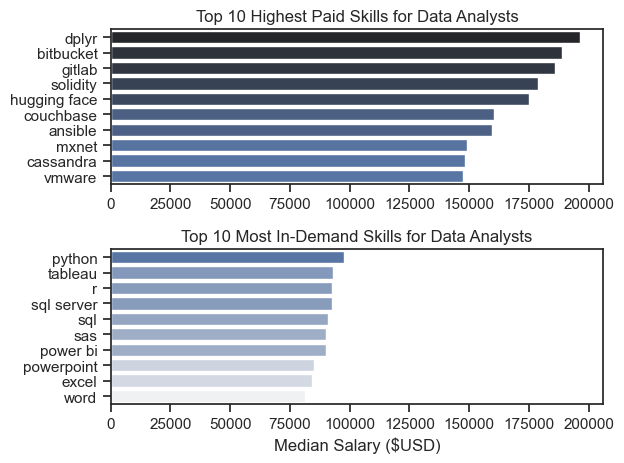

In [11]:
import seaborn as sns

sns.set_theme(style = 'ticks')

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by = 'median', ascending = False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'median', ascending = False)

fig, ax  = plt.subplots(2, 1)

# df_DA_top_pay.plot(kind = 'barh', y = 'median', ax = ax[0], legend = False)
sns.barplot(data = df_DA_top_pay, x = 'median', y = df_DA_top_pay.index, ax = ax[0], hue = 'median', palette = 'dark:b_r') # r is to reverse order
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()


# df_DA_skills.plot(kind = 'barh', y = 'median', ax = ax[1], legend = False)
sns.barplot(data = df_DA_skills, x = 'median', y = df_DA_skills.index, ax = ax[1], hue = 'median', palette = 'light:b')
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].legend().remove()


# For the following can also reverse dataframe rows using [::-1]
# ax[0].invert_yaxis()                              <----- For Seaborn you don't need to invert axis, its intuitive
# ax[1].invert_yaxis()

# Making xlims same
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()



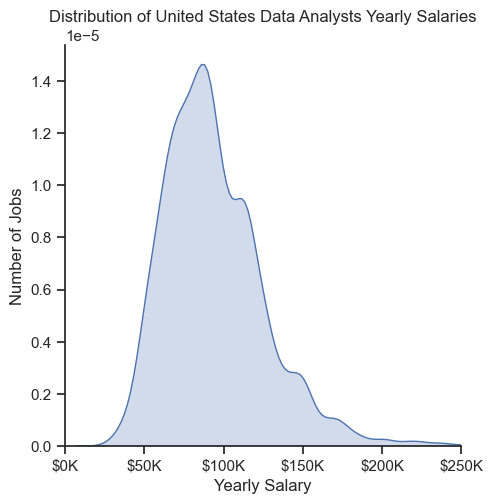

In [15]:


df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]
# df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 40, edgecolor = 'black')

sns.set_style(style = 'ticks')
sns.displot(df_DA_US['salary_year_avg'], kind = 'kde', fill = True)
plt.xlim(0, 250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title('Distribution of United States Data Analysts Yearly Salaries')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary')

plt.show()


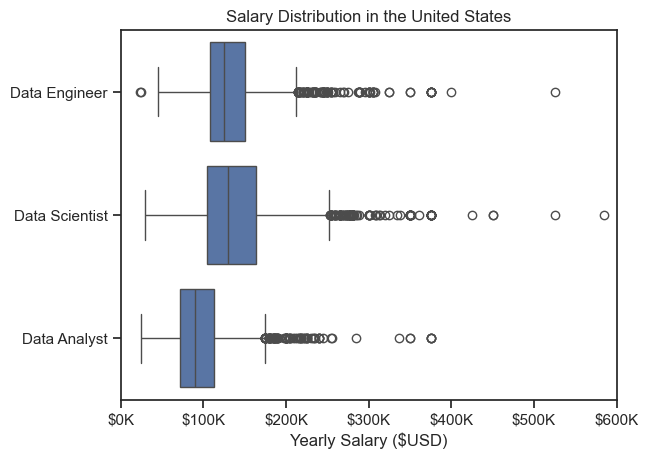

In [17]:
# Box plots in seaborn
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset = ['salary_year_avg'])


job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

sns.boxplot(df_US, x = 'salary_year_avg', y = 'job_title_short')
# plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title('Salary Distribution in the United States')
plt.ylabel('')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()